# PRÁCTICA 3 ESTADÍSTICA

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2, norm, t

In [2]:
def plot_regions(x, y, tsup, tinf=None, tobs=None):

    plt.figure(figsize=(10, 3))
    if tinf is None:
        plt.fill_between(x, 0, y, (x <= tsup), facecolor='green')
        plt.fill_between(x, 0, y, (x > tsup), facecolor='red')
    else:
        plt.fill_between(x, 0, y, (x >= tinf) & (x <= tsup), facecolor='green')
        plt.fill_between(x, 0, y, (x < tinf), facecolor='red')
        plt.fill_between(x, 0, y, (x > tsup), facecolor='red')

    plt.plot(x, y, '-k', linewidth=2.0)
    
    if tobs is not None:
        plt.plot([tobs, tobs], [0, 0.5*y.max()], '-b', linewidth=2.0)

    plt.grid(True)
    plt.title("Regiones de aceptacion y rechazo")
    plt.show()

## Ejercicio 1


La desviación estándar de un proceso en condiciones correctas es 3.2. Se toma una
muestra de tamaño 12 y se observan los siguientes valores: 25, 17, 18, 27, 17, 22, 16, 20,
24, 20, 22 y 16.
- Contrasta la hipótesis de funcionamiento correcto con un nivel de significación de 0.05
- Calcula el nivel crítico del contraste
- Suponiendo una desviación estándar como la observada, ¿cuál es el tamaño máximo que debería tener la muestra para poder aceptar la hipótesis?


In [3]:
sigma = 3.2
sample = [25, 17, 18, 27, 17, 22, 16, 20, 24, 20, 22, 16]
n = len(sample)
alpha=.05

print(n, sigma)

12 3.2


Se asume que la variable aleatoria que se está midiendo sigue una distribución normal $X \sim N(\mu, 3.2)$.

Si el funcionamiento es correcto, entonces $\sigma^2 = 10.24$. Por otro lado, se considera funcionamiento incorrecto que $\sigma^2 \gt 10.24$, ya que una varianza menor no es relevante para el problema. Por tanto, para contrastar la hipótesis de funcionamiento correcto se puede plantear el siguiente test:

$H_0: \sigma^2 = 10.24$

$H_1: \sigma^2 \gt 10.24$

Para este caso, tomando como diferencia 
$$d = \frac{(n-1)\hat{s}^2}{\sigma_0^2} \sim \chi^2_{n-1}$$

y como nivel de significación $\alpha=0.05$, la región de aceptación es:

$$
d=\frac{(n-1)\hat{s}^2}{\sigma_0^2} \leq \chi_{n-1;1-\alpha}^2 
$$

donde $\chi^2_{\alpha}$ denota el percentil $\alpha$ de la distribución, es deicir, cumple que : $p\lbrace \chi^2_{\alpha} < \chi^2_{n}\rbrace = \alpha$


In [4]:
s_hat = np.var(sample, ddof=1)
sup = chi2.ppf(1-alpha, n-1)
d = (n-1)*s_hat/sigma**2

sup, d

(19.67513757268249, 14.713541666666666)

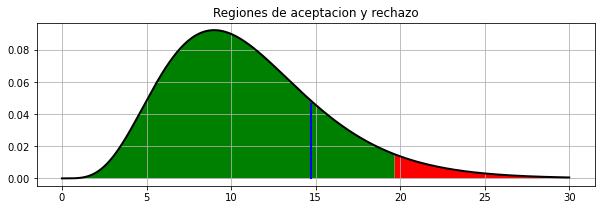


región de aceptación: 
0 19.67513757268249

discrepancia:  14.713541666666666


In [5]:
x = np.arange(0, 30, .01)
y = chi2.pdf(x, df=n-1)

plot_regions(x, y, tsup=sup, tobs=d)
print('\nregión de aceptación: ')
print(0, sup)
print('\ndiscrepancia: ', d)

El pvalor del test, sabiendo que $d \sim \chi^2_{11} $ es $\alpha = P\lbrace d \ge \hat{d} | H_0\rbrace = P\lbrace \chi^2_{11} \ge 14.71\rbrace = 0.19$

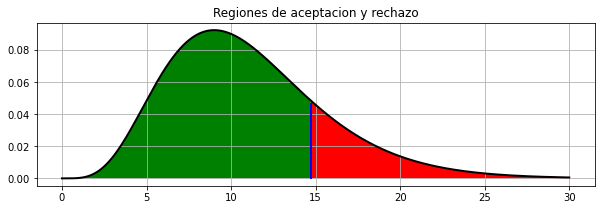

pvalor:  0.19599029375811738


In [6]:
pvalue = 1-chi2.cdf(d, n-1)

x = np.arange(0, 30, 0.01)
y = chi2.pdf(x, df=n-1)
plot_regions(x, y, tsup=d, tobs=d)
print('pvalor: ', pvalue)

El tamaño muestral máximo para un nivel de significación $\alpha=0.05$ viene dado por la región de aceptación:

$$
\frac{(n-1)\hat{s}^2}{\sigma_0^2} \leq \chi_{1-\alpha}^2 
$$

y despejando $n$ se tiene:

$$n \le 1 + \frac{\chi^2_{1-\alpha}\sigma_0^2}{\hat{s}^2} \approx 15$$

In [7]:
n_max = 1+(sup*sigma**2)/s_hat
n_max

15.709341788851477

## Ejercicio 2

Un proceso industrial fabrica piezas cuyas longitudes se distribuyen normalmente con
media 150 y desviación estándar 10. En una muestra de tamaño 5 se obtienen las
longitudes 147, 162, 155, 168 y 149.
- Contrasta que la media es 150 con un nivel de significación de 0.05.
- Contrasta que la varianza es 100 con un nivel de significación de 0.05.

In [8]:
sample = [147, 162, 168, 149]
mean_sample=np.mean(sample)
n=len(sample)

mu_0=150
sigma=10
alpha=.05

Al tratarse de un proceso industrial, se asume que las piezas con una longitud significativamente mayor o menor que la media son defectuosas, por lo que para la media se usará un contraste bilateral. Para la varianza se usará un contraste unilateral, ya que si es menor de lo previsto no es relevante.

Sea $X=$"longitud de la pieza" tal que $X\sim N(150, 10)$ y la muestra aleatoria simple propuesta, para contrastar si la media es $\mu=150$ se puede plantear el siguiente test:


$H_0: \mu=150$

$H_1: \mu \ne 150$

Estableciendo la medida de discrepancia como 

$$
d = \frac{\bar{x}-\mu_0}{\hat{s}/\sqrt{n}} \sim t_{n-1}
$$

entonces, bajo el supuesto de que $H_0$ es cierta, se tiene que: $d \sim t_{n-1}$ y la región de rechazo, fijado el nivel de significacion $\alpha = 0.05$, viene dada por la expresión:

$$
P\lbrace d>\hat{d} | H_0\rbrace = P\lbrace t_{n-1}>\frac{|\bar{x}-\mu_0|}{\hat{s}/\sqrt{n}}| H_0\rbrace = 
 \alpha
$$

Es decir, por la simetría de la distribución normal, la región de aceptación es:

$$t_{\alpha/2}<\hat{d}<t_{1-\alpha/2}$$

y en términos de la media muestral sería:

$$
\mu_0+t_{\alpha/2}\hat{s}/\sqrt{n}<\bar{x}<\mu_0+t_{\alpha/2}\hat{s}/\sqrt{n}
$$


In [9]:
inf = t.ppf(alpha/2, df=n-1) 
sup = t.ppf(1-alpha/2, df=n-1)

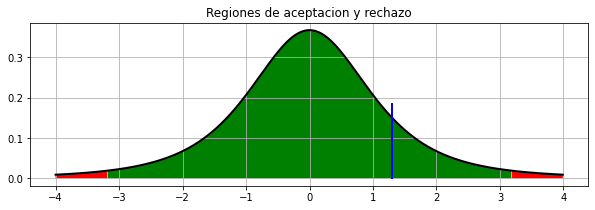


región de aceptación: 
-3.1824463052842638 3.182446305284263

discrepancia:  1.3

pvalor:  0.28446750872789694


In [10]:
d = (mean_sample-mu_0)/(sigma/np.sqrt(n))

x = np.arange(-4, 4, 0.01)
y = t.pdf(x, df=n-1)
plot_regions(x, y, tsup=sup, tinf=inf, tobs=d)
print('\nregión de aceptación: ')
print(inf, sup)
print('\ndiscrepancia: ', d)
print('\npvalor: ', 2*(1-t.cdf(d, df=n-1)))

Para el caso de la varianza, se puede aplicar el contraste:

$H_0: \sigma^2 = 100$

$H_1: \sigma^2 \gt 100$

y con las mismas hipótesis que el caso anterior, pero con la medida de discrepancia:

$$ d = \frac{(n-1)\hat{s}^2}{\sigma_0^2} $$

Se tiene que la región de aceptación es:

$$\frac{(n-1)\hat{s}^2}{\sigma_0^2} \leq \chi_{1-\alpha}^2 $$

que en términos de la cuasivarianza muestral sería:

$$
\hat{s}^2 \le \frac{\sigma_0^2\chi_{1-\alpha}^2 }{n-1}
$$

In [11]:
sigma_0 = 100
s_hat = np.var(sample, ddof=1)

d = ((n-1)*s_hat**2)/sigma_0**2

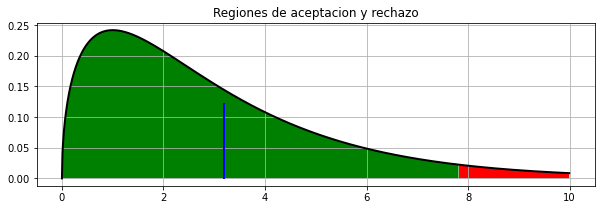

pvalor:  0.3643050902646161

discrepancia:  3.1827

región de aceptación: 


(0, 7.814727903251179)

In [12]:
sup = chi2.ppf(1-alpha, df=n-1)

x = np.arange(0, 10, 0.01)
y = chi2.pdf(x, df=n-1)
plot_regions(x, y, tsup=sup, tobs=d)
print('pvalor: ', 1-chi2.cdf(d, df=n-1))
print('\ndiscrepancia: ', d)

print('\nregión de aceptación: ')
0, sup

Se concluye que no existe evidencia suficiente para rechazar que la media es 150 y la varianza es 100, ya que con los datos provistos, las dicrepancias observadas no superan los límites establecidos y los pvalores son suficientemente altos como para no rechazar las hipótesis nulas.

## Ejercicio 3

Un partido político afirma que el 55% de los electores está de acuerdo con su programa.
Se toma una muestra de 1000 electores y se obtiene una proporción del 52%. ¿Puede el
partido sostener su afirmación con un nivel de significación de 0.05? ¿Qué tamaño debería
tener la muestra para poder rechazar la afirmación con un nivel de significación de 0.01 ?

In [13]:
p_0 = .55
p_obs=.52
alpha=.05
n=1000

Se asume que el partido político no cree que sea más de un 55%, ya que en ese caso afirmaría que hay más. Por tanto, se empleará un contraste unilateral de la forma:


$H_0: \textrm{La cantidad de electores es correcta y el partido tiene razón} \Rightarrow p = 0.55 \textrm{ equivalente a } p \ge 0.55$

$H_1: \textrm{La cantidad de electores no es correcta y el partido no tiene razón} \Rightarrow p \lt 0.55$

Al tratarse de una muestra grande, se puede aplicar el teorema central de límite, y se deduce que:

$$\hat{p} \sim N(p, \sqrt{np(1-p)})$$

Luego, tomando como medida de discrepancia:

$$d = \frac{p_0 - \hat{p}}{\sqrt{\frac{p_0 (1 - p_0)}{n}}}$$

tal que:

$$d \sim N(0, 1)$$

Finalmente, la región de aceptación, teniendo en cuenta el signo de la discrepancia, es:

$$
\hat{d} \gt z_{\alpha}
$$

In [14]:
d = -(p_0 - p_obs)/(np.sqrt(p_0*(1-p_0)/n))
inf = norm.ppf(alpha)

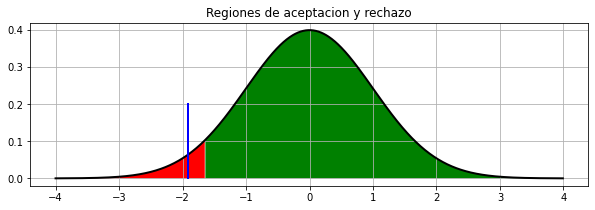


pvalor:  0.028265138583701995

discrepancia:  -1.9069251784911863

región de aceptación: 


(-1.6448536269514729, inf)

In [15]:
x = np.arange(-4, 4, 0.01)
y = norm.pdf(x, loc=0, scale=1)
plot_regions(x, y, tinf=inf, tsup=100, tobs=d)
print('\npvalor: ', norm.cdf(d))
print('\ndiscrepancia: ', d)
print('\nregión de aceptación: ')
inf, np.inf

Se concluye que no existe evidencia suficiente para dar la razón al partido político, ya que la discrpeancia observada es superior al valor teórico máximo asumiendo que la hipótesis nula (tiene razón) es cierta. El pvalor confirma esta conclusión ya que es significativamente más bajo que el nivel crítico.

Nótese que si el test fuera bilateral, podría discutirse no rechazar la hipótesis nula, ya que se reparte la cola del 5% por la derecha y por la izquierda. Sin embargo, tal test carece de sentido práctico, ya que si el partido tuviese la mínima sospecha de que puede haber más electorado de acuerdo, elevaría esa proporción en su comunicado. Por lo que a priori, lo más práctico es un contraste unilateral.

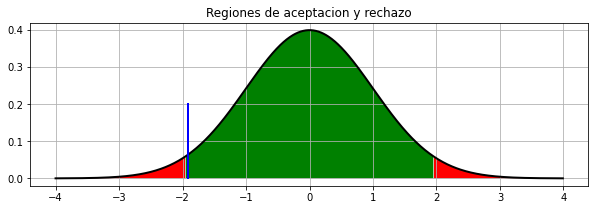

pvalor:  0.05653027716740399

discrepancia:  -1.9069251784911863

región de aceptación: 


(-1.9599639845400545, 1.959963984540054)

In [16]:
p_0 = .55
p_obs=.52
alpha=.05
n=1000

d = -(p_0 - p_obs)/(np.sqrt(p_0*(1-p_0)/n))
sup = norm.ppf(1-alpha/2)
inf = norm.ppf(alpha/2)

x = np.arange(-4, 4, 0.01)
y = norm.pdf(x, loc=0, scale=1)
plot_regions(x, y, tsup=sup, tinf=inf, tobs=d)
print('pvalor: ', 2*(norm.cdf(d)))
print('\ndiscrepancia: ', d)
print('\nregión de aceptación: ')
inf, sup

Ahora bien, se ve que si establecemos el nivel de significación en $\alpha = 0.01$ no se podría rechar la hipótesis nula al 99% de seguridad. Aunque el pvalor está muy cerca del nivel de significación.

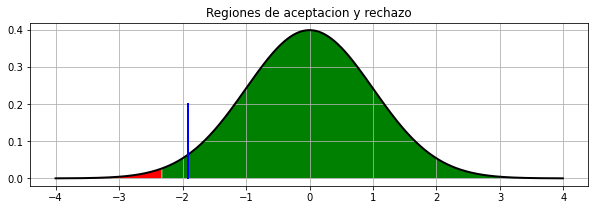

pvalor:  0.028265138583701995

discrepancia:  -1.9069251784911863

región de aceptación: 


(-2.3263478740408408, inf)

In [17]:
p_0 = .55
p_obs=.52
alpha=.01
n=1000

d = -(p_0 - p_obs)/(np.sqrt(p_0*(1-p_0)/n))
inf = norm.ppf(alpha)

x = np.arange(-4, 4, 0.01)
y = norm.pdf(x, loc=0, scale=1)
plot_regions(x, y, tinf=inf, tsup=100, tobs=d)
print('pvalor: ', norm.cdf(d))
print('\ndiscrepancia: ', d)
print('\nregión de aceptación: ')
inf, np.inf

Para ver qué tamaño muestral sería necesario para rechazar la hipótesis nula si $\alpha = 0.01$, desarrollamos la expresión de la región de rechazo:

$$\frac{p_0 - \hat{p}}{\sqrt{\frac{p_0 (1 - p_0)}{n}}} = \hat{d}>z_{1-\alpha} = z_{0.99}$$

de manera que el tamaño muestral mínimo que se obtiene es:

$$
n \ge \frac{z_{0.99}^2p_0(1-p_0)}{(p_0 - \hat{p})^2} \approx 1489
$$

In [18]:
n_min = (norm.ppf(.99)**2*p_0*(1-p_0))/((p_0-p_obs)**2)
print('tamaño muestral mínimo: ', n_min) 

tamaño muestral mínimo:  1488.2709685399407


Comprobación del resultado

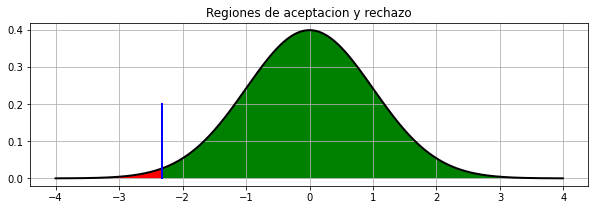

pvalor:  0.009984825999947024

discrepancia:  -2.3269175865392104

región de aceptación: 


(-2.3263478740408408, inf)

In [19]:
p_0 = .55
p_obs=.52
alpha=.01
n=1489

d = -(p_0 - p_obs)/(np.sqrt(p_0*(1-p_0)/n))
inf = norm.ppf(alpha)

x = np.arange(-4, 4, 0.01)
y = norm.pdf(x, loc=0, scale=1)
plot_regions(x, y, tinf=inf, tsup=100, tobs=d)
print('pvalor: ', norm.cdf(d))
print('\ndiscrepancia: ', d)
print('\nregión de aceptación: ')
inf, np.inf

# Ejercicio 4

Un fabricante afirma que sus baterías tienen una capacidad de al menos 140
amperios-hora. Una agencia de consumidores quiere comprobar la credibilidad de tal
afirmación, para lo cual mide la capacidad de 20 baterías nuevas. Los resultados son los
siguientes:

135.4 141.0 137.8 139.1 144.4 139.2 141.8 137.3 132.5 137.8 141.1 139.7 136.7 136.3 135.6 138.2 140.5 140.6 136.7 133.6


Con un nivel de significación del 0.05, ¿hay evidencia suficiente de que el fabricante ha
inflado la capacidad de sus baterías?

In [20]:
sample = [135.4, 141.0, 137.8, 139.1, 144.4, 139.2, 141.8, 137.3, 132.5, 137.8, 141.1, 139.7, 136.7, 136.3, 135.6, 138.2, 140.5, 140.6, 136.7, 133.6]
n = len(sample)
sample_mean = np.mean(sample)
mu_0 = 140

Se entiende que los consumidores estan interesados en saber si el fabricante su especificación ($\mu = 140$) o bien la incumple ($\mu < 140$), por lo que se plantea un test unilateral. Así, se puede plantear un test la siguiente forma:


$H_0: \mu \ge140 \textrm{ equivalente a } H_0: \mu = 140$

$H_1: \mu \lt 140$

Se asume también que la población es normal y que la muestra es pequeña, $n<30$, por lo que se usa la distribución de Student para el contraste.

Tomando como medida de discrepancia:

$$ d = \frac{\bar{x} - \mu_0}{\hat{s}/\sqrt{n}} \sim t_{n-1}$$

Y así, teniendo en cuenta el signo de la discrepancia, la región de aceptación es:

$$\hat{d} > t_{\alpha}$$

In [21]:
s_hat = np.std(sample, ddof=1)
d = (sample_mean-mu_0)/(s_hat/np.sqrt(n))

inf = t.ppf(alpha, df=n-1)

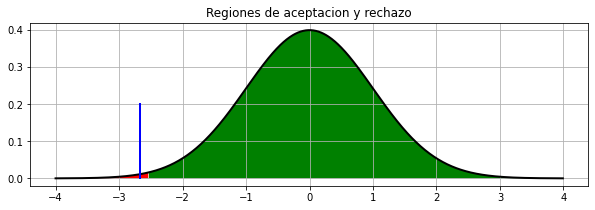

pvalor:  0.007528707414454077

discrepancia:  -2.672432782188594

región de aceptación: 


(-2.5394831906222888, inf)

In [22]:
plot_regions(x, y, tsup=100, tinf=inf, tobs=d) # 100 como sup es un valor instrumental
print('pvalor: ', t.cdf(d, df=n-1))
print('\ndiscrepancia: ', d)
print('\nregión de aceptación: ')
inf, np.inf

Se concluye que debe rechazarse la afirmación del fabricante, ya que la discrepancia encontrada en la muestra es muy superior al valor teórico. Esta decisión viene apoyada además por el pvalor, que toma un valor muy pequeño (<0.01).